Using the phugoid model, write new code to analyze the flight of a paper airplane

In [71]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [72]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}   
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###
v0 = v_t     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 2  # initial altitude


thetaValues = numpy.array([0,5,10,15,20,25,30,35,40,45])
velocityValues = numpy.array([0,1,2,3,4,5,6,7,8,9,10])

In [73]:
def f(u):
    v = u[0]
    theta= u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta)-C_D/C_L*g/v_t**2*v**2, -g*cos(theta)/v+g/v_t**2*v,v*cos(theta), v*sin(theta)])

In [74]:
def euler_step(u, f, dt):
    return u + dt*f(u)

In [75]:
T = 100 #final time
dt = 0.1 #time increment
N = int(T/dt) + 1 #number of time-steps
t = numpy.linspace(0, T, N) #time discretization

#initialize the array containing the solution for each time-step
u = numpy.empty((N, 4))
u[0]= numpy.array([v0, theta0, x0, y0]) #fill 1st element with initial values

#time loop - Euler method
for n in range(N-1):
    if u[n, 3] < 0:
        valueN = n
        break
    u[n+1] = euler_step(u[n], f, dt)

In [76]:
#create a new array that goes from 0 to N
array_1 = u[0:valueN,:]

#get the paper airplane's position with respect to time
x = array_1[:,2]
y = array_1[:,3]

In [ ]:
for i, theta in enumerate(thetaValues):
    for j, velocity in enumerate(velocityValues):
        

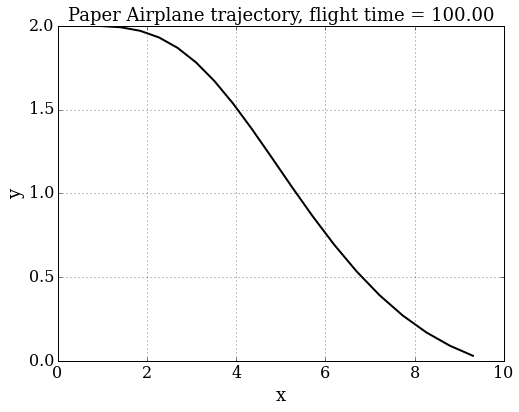

In [77]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Paper Airplane trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);